# Ventilator EDA - Break up into R=5  and C=20 subset

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('whitegrid')

In [2]:
train = pd.read_csv(r'F:\Sync\Work\Kaggle Competitions\Ventilator Pressure Prediction\Data\train.csv')
test = pd.read_csv(r'F:\Sync\Work\Kaggle Competitions\Ventilator Pressure Prediction\Data\test.csv')

In [3]:
trainR5= train[train.R==5]
trainR5C20 = trainR5[trainR5.C == 20]

In [4]:
trainR5C20.head()

,id,breath_id,R,C,time_step,u_in,u_out,pressure
1120,1121,17,5,20,0.000000,12.557928,0,6.681117
1121,1122,17,5,20,0.034231,27.125642,0,7.665347
1122,1123,17,5,20,0.069309,29.353279,0,9.211995
1123,1124,17,5,20,0.103377,31.612488,0,10.196225
1124,1125,17,5,20,0.137508,32.978720,0,11.602268


In [5]:
# function to get single breath (id must exist...there are some that are missing)
def get_breath(df,my_id):
    # generate start stop points
    start = 80 * my_id
    stop = start + 80
    return df.iloc[start:stop,:]

In [6]:
def plot_breath(df,my_id):
    id1 = get_breath(df,my_id)
    r = id1.R.iloc[0]
    c = id1.C.iloc[0]
    plt.figure(figsize=(8,5))
    plt.plot(id1.pressure,label='pressure')
    plt.plot(id1.u_in,label='u_in')
    plt.plot(id1.u_out,label='u_out')
    plt.title(f'Pressure and u_in for Breath id={my_id}, R={r}, C={c}')
    plt.legend();

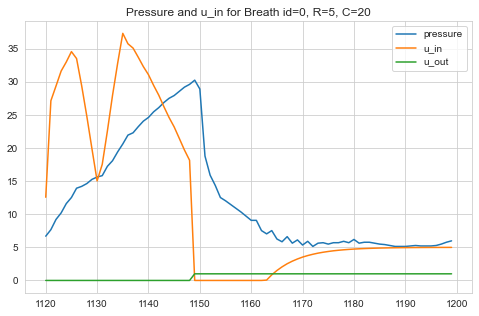

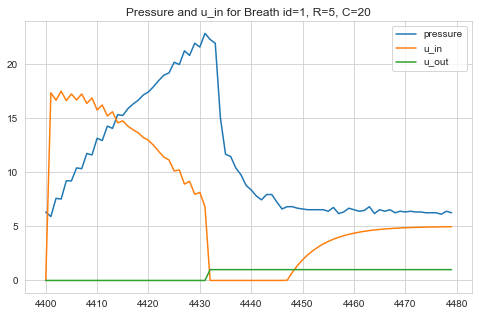

In [7]:
plot_breath(trainR5C20,0)
plot_breath(trainR5C20,1)

### R=50 and C=50 Analysis
* Pressure follows u_in curve pretty closely 
    * proportional control
    * but with a multiplier that doesn't seem consistent
* integration seems to hava a role
* so does derivative


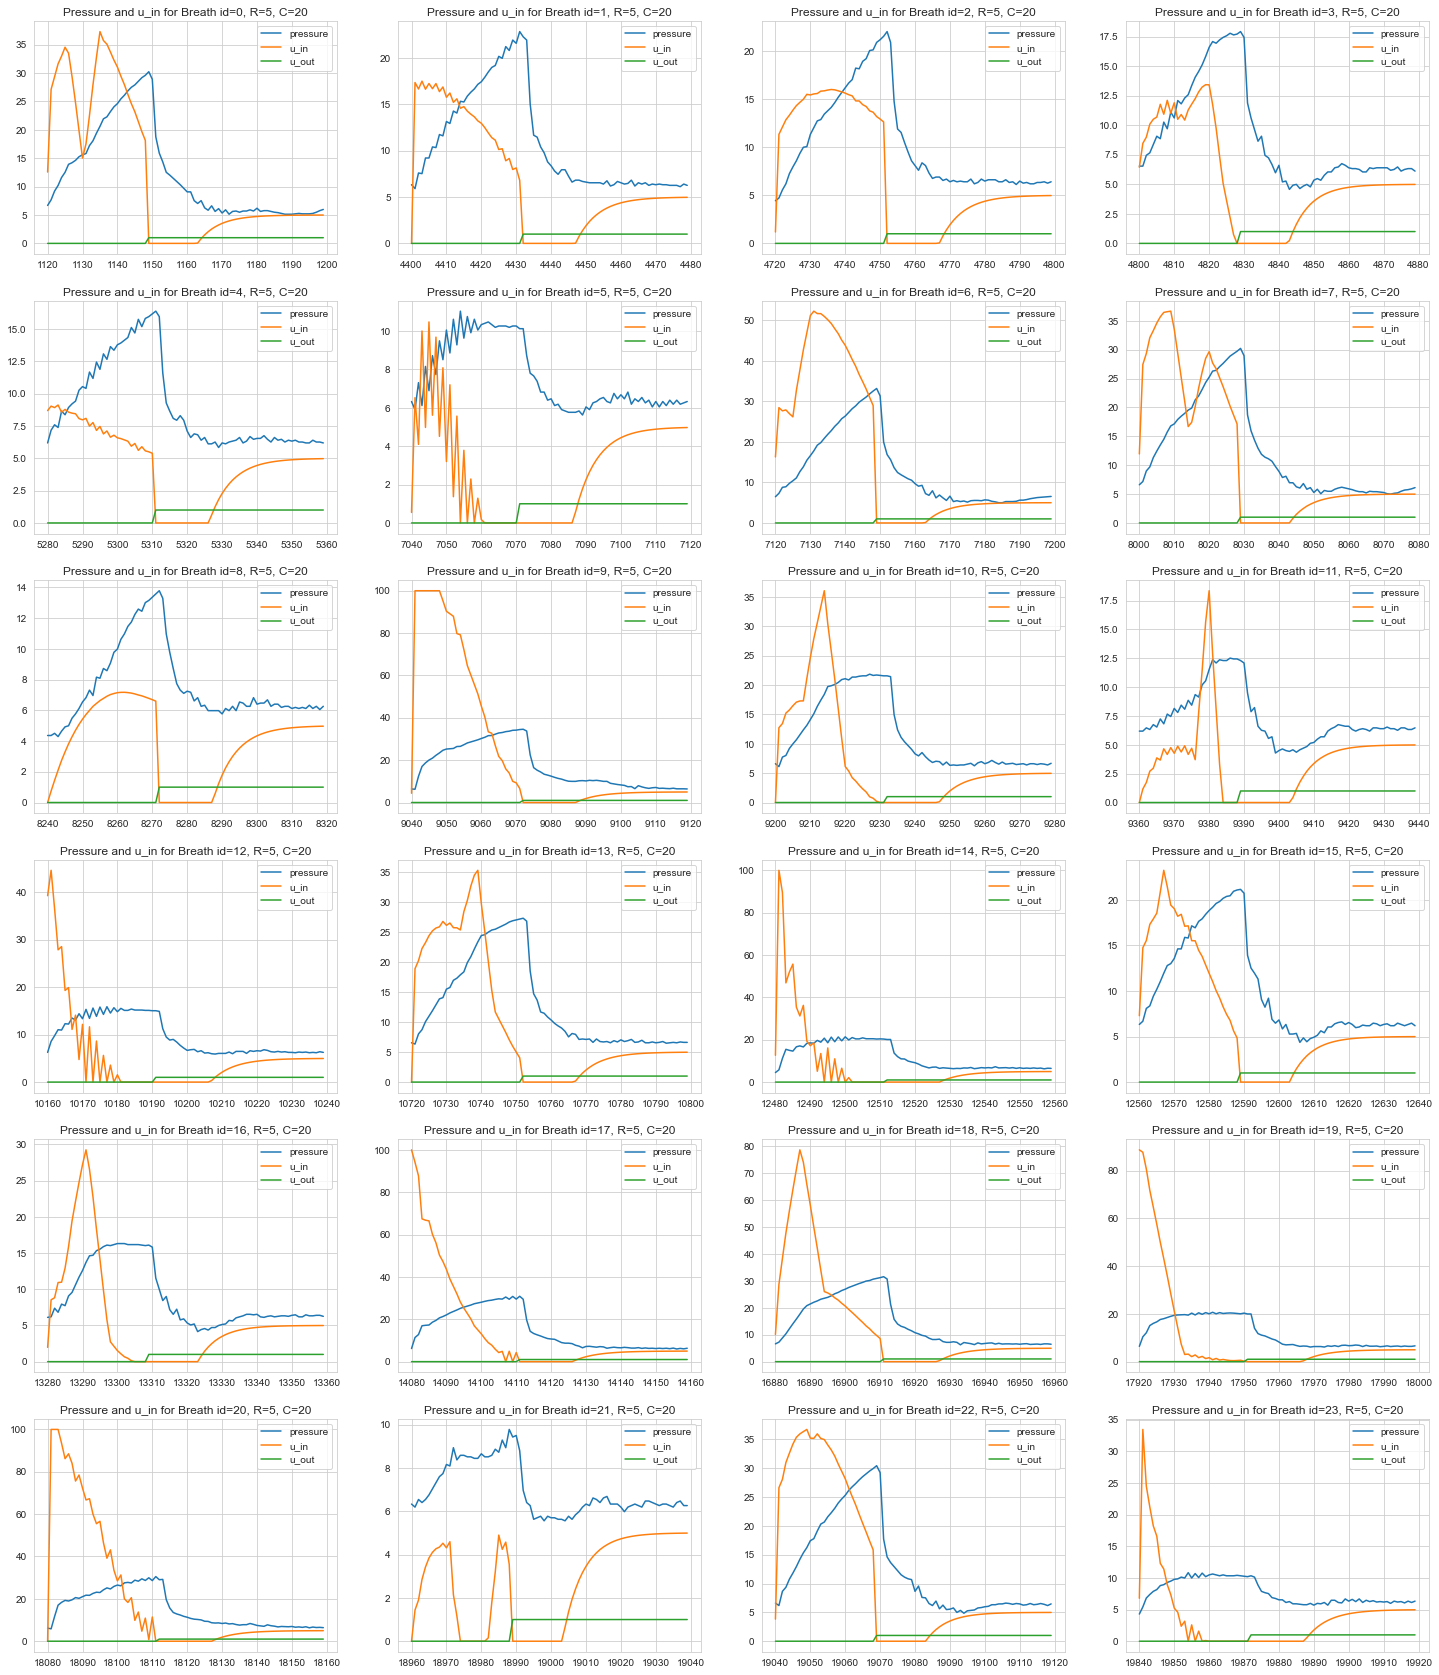

In [9]:
fig, ax = plt.subplots(6, 4, figsize=(25,30))
ax = ax.flatten()
for i in range(24):
    id1 = get_breath(trainR5C20,i)
    r = id1.R.iloc[0]
    c = id1.C.iloc[0]
    ax[i].plot(id1.pressure,label='pressure')
    ax[i].plot(id1.u_in,label='u_in')
    ax[i].plot(id1.u_out,label='u_out')
    ax[i].set_title(f'Pressure and u_in for Breath id={i}, R={r}, C={c}')
    ax[i].legend();
    
plt.savefig('R5C20_24Plots.png')

Plot integrated u_in vs. max pressure